In [3]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

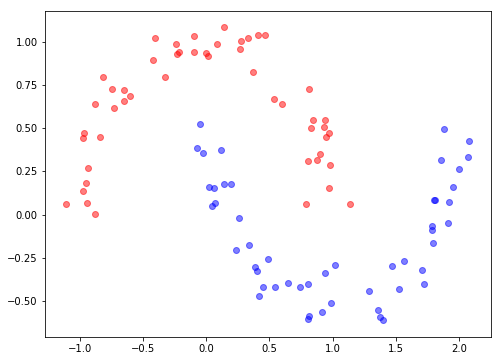

In [13]:
# See the data 
X, y = make_moons(n_samples=100, noise=0.1)
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.show()